![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)

<table align="center">
  <td>
    <a href="https://colab.research.google.com/github/jpcano1/MINE_4210_Analisis_con_Deep_Learning/blob/master/lab_1/practica_1/practica_1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
  </td>
</table>

# **Pŕactica No. 2**
## **Clasificación Multiclase**

## **Objetivos**
- Introducción a las imágenes
- Entrenamiento de una red neuronal de una sola capa
- Introducción a la clasificación multiclase

In [1]:
!shred -u setup_colab_general.py
!wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py
import setup_colab_general as setup_general
setup_general.setup_general()

shred: setup_colab_general.py: failed to open for writing: No such file or directory


  0%|          | 0/3 [00:00<?, ?KB/s]

General Functions Enabled Successfully


## **Importando las librerías necesarias para el laboratorio**

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import seaborn as sns

from utils import general as gen

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

## **Partición y Lectura**

In [3]:
(full_X_train, full_y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
full_X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
splitter = StratifiedShuffleSplit(test_size=0.2, random_state=1234)

In [6]:
for train_index, val_index in splitter.split(full_X_train, full_y_train):
    X_train, y_train = full_X_train[train_index], full_y_train[train_index]
    X_val, y_val = full_X_train[val_index], full_y_train[val_index]

## **Modelamiento**

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(32, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
compilation_kwargs = {
    "metrics": [keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
    "loss": keras.losses.SparseCategoricalCrossentropy(name="loss"),
    "optimizer": "rmsprop"
}

In [9]:
model.compile(**compilation_kwargs)

In [10]:
train_args = (X_train, y_train)
train_kwargs = {
    "batch_size": 64,
    "validation_data": (X_val, y_val),
    "epochs": 10
}

history = model.fit(*train_args, **train_kwargs)

Epoch 1/10
750/750 [==============================] - 4s 3ms/step - loss: 1.9286 - accuracy: 0.6853 - val_loss: 0.7946 - val_accuracy: 0.8402
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.6188 - accuracy: 0.8587 - val_loss: 0.5365 - val_accuracy: 0.8719
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.4708 - accuracy: 0.8951 - val_loss: 0.4874 - val_accuracy: 0.9008
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3963 - accuracy: 0.9131 - val_loss: 0.3803 - val_accuracy: 0.9071
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3326 - accuracy: 0.9276 - val_loss: 0.3138 - val_accuracy: 0.9365
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2678 - accuracy: 0.9383 - val_loss: 0.3340 - val_accuracy: 0.9342
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2379 - accuracy: 0.9452 - val_loss: 0.2798 - val_accuracy: 0.9335
Epoch 

In [11]:
np.random.seed(1234)
random_sample = np.random.choice(len(X_test), 9)
y_pred = model.predict(X_test[random_sample])

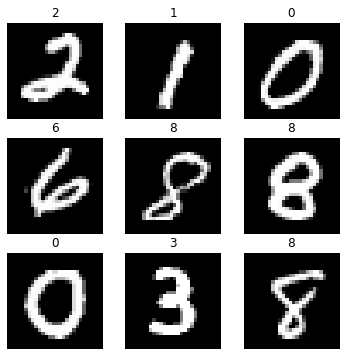

In [12]:
gen.visualize_subplot(
    X_test[random_sample], 
    y_pred.argmax(axis=1), 
    (3, 3), (6, 6)
)

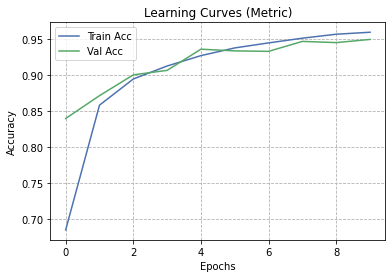

In [13]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], Label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(linestyle="--")
plt.title("Learning Curves (Metric)")
plt.show()

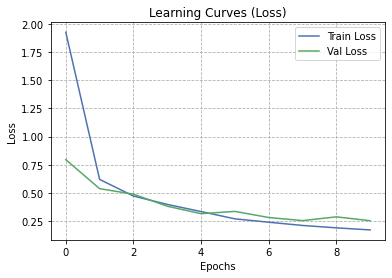

In [14]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.grid(linestyle="--")
plt.title("Learning Curves (Loss)")
plt.show()

## **Validación**

In [15]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.9511


In [16]:
loss

0.2877765893936157

In [17]:
acc

0.9510999917984009

In [18]:
y_pred = model.predict(X_test)

In [20]:
conf_mat = confusion_matrix(y_test, y_pred.argmax(axis=1))

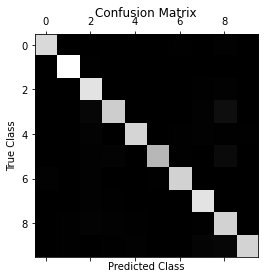

In [21]:
plt.matshow(conf_mat, cmap="gray")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [23]:
norm_conf_mat = conf_mat / conf_mat.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mat, 0)

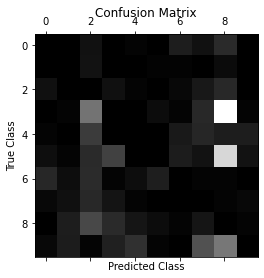

In [24]:
plt.matshow(norm_conf_mat, cmap="gray")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [27]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.91      0.97      0.94      1032
           3       0.96      0.90      0.92      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.90      0.94       892
           6       0.97      0.96      0.97       958
           7       0.94      0.98      0.96      1028
           8       0.85      0.95      0.89       974
           9       0.98      0.92      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

